In [1]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV
from scipy import stats
import joblib

## Exploratory analysis:

In [2]:
df = pd.read_csv("/kaggle/input/spotify-tracks-datasets/tracks.csv")
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [4]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [5]:
sum(df.duplicated()) # Are there duplicates?

0

In [6]:
numeric_columns = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]
print(numeric_columns)
no_interest = ['track_number','disc_number','explicit','time_signature', 'year']
features = [f for f in numeric_columns if f not in no_interest]
features

['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [7]:
df_features = df[features]
df_features

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6,126903,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851
1,0,98200,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009
2,0,181640,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418
3,0,176907,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980
4,0,163080,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,50,258267,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896
586668,72,153293,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091
586669,70,187601,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095
586670,58,142003,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029


<AxesSubplot:>

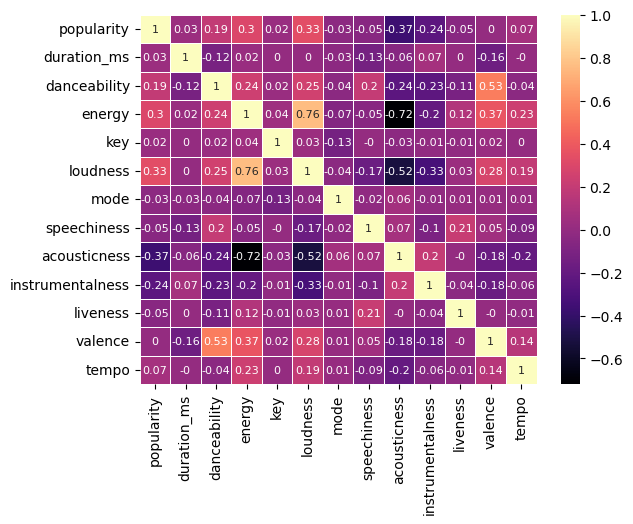

In [8]:
sb.heatmap(df_features.corr().round(2), annot=True, cmap="magma",
           annot_kws={"size": 8},linewidths=.5)

In [9]:
df_features.corr().round(2)['popularity'].sort_values(ascending=False)

popularity          1.00
loudness            0.33
energy              0.30
danceability        0.19
tempo               0.07
duration_ms         0.03
key                 0.02
valence             0.00
mode               -0.03
speechiness        -0.05
liveness           -0.05
instrumentalness   -0.24
acousticness       -0.37
Name: popularity, dtype: float64

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

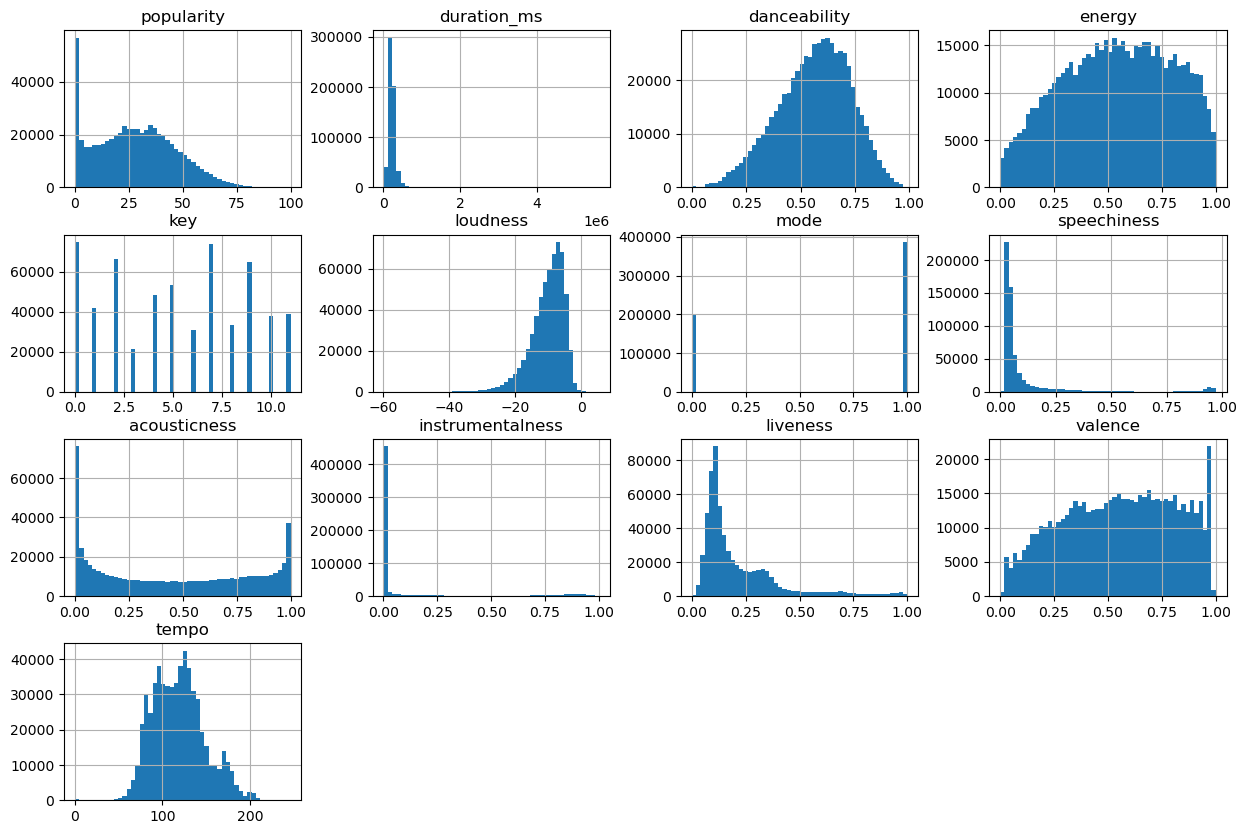

In [10]:
df_features.hist(bins=50,figsize = (15,10))

<AxesSubplot:xlabel='key', ylabel='popularity'>

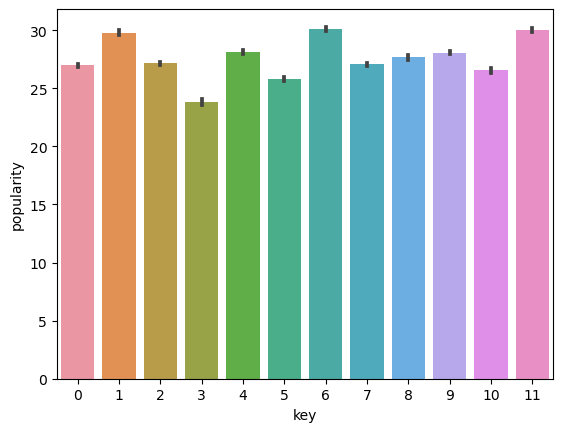

In [11]:
sb.barplot(data=df_features,x='key',y='popularity')

<AxesSubplot:xlabel='key', ylabel='popularity'>

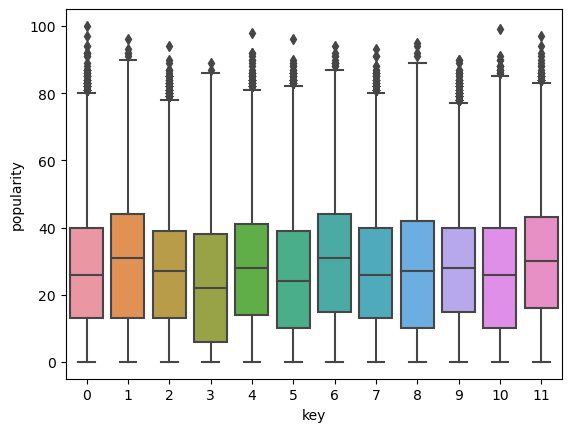

In [12]:
sb.boxplot(data=df_features,x='key',y='popularity')

<AxesSubplot:xlabel='valence', ylabel='popularity'>

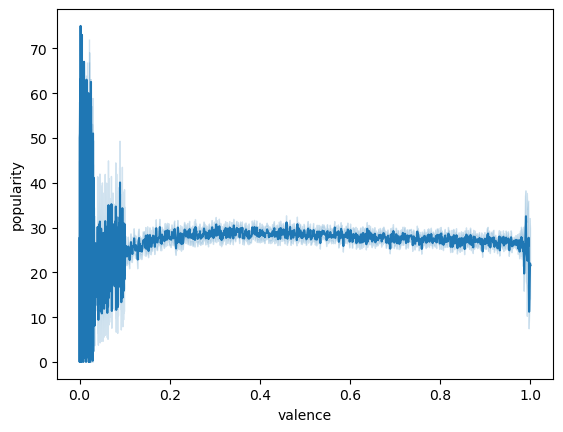

In [13]:
sb.lineplot(data=df_features,x='valence',y='popularity')

## Modeling using important numerical features only:

In [14]:
sqrt_pipeline = make_pipeline(
FunctionTransformer(np.sqrt),
StandardScaler())

default_pipeline = make_pipeline(StandardScaler())

preprocessing = ColumnTransformer([
    ("sqrt",sqrt_pipeline,["duration_ms","speechiness","acousticness",
                        "instrumentalness","liveness","tempo"])
],
remainder = default_pipeline )

In [15]:
train_set, test_set = train_test_split(df_features,test_size=0.2,random_state=69)
print("Train:",len(train_set),"","Test:",len(test_set))

Train: 469337  Test: 117335


In [16]:
tracks = train_set.drop("popularity",axis=1)
tracks_labels = train_set["popularity"].copy()

In [17]:
lin_model = make_pipeline(preprocessing,LinearRegression())
lin_model.fit(tracks,tracks_labels)

lin_predictions = lin_model.predict(tracks)
lin_rmse = mean_squared_error(tracks_labels,lin_predictions,squared=False)
lin_rmse

16.385463538078607

In [18]:
d_tree_model = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=69))
d_tree_model.fit(tracks,tracks_labels)

d_tree_predictions = d_tree_model.predict(tracks)
d_tree_rmse = mean_squared_error(tracks_labels,d_tree_predictions,squared=False)
d_tree_rmse

1.8463565076764248

In [19]:
r_forest_model = make_pipeline(preprocessing, RandomForestRegressor(random_state=69))
r_forest_model.fit(tracks,tracks_labels)

r_forest_predictions = r_forest_model.predict(tracks)
r_forest_rmse = mean_squared_error(tracks_labels,r_forest_predictions,squared=False)
r_forest_rmse

5.619510641098086

In [20]:
line_rmses = -cross_val_score(lin_model,tracks,tracks_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
d_tree_rmses = -cross_val_score(d_tree_model,tracks,tracks_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
r_forest_rmses = -cross_val_score(r_forest_model,tracks,tracks_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [21]:
pd.Series(line_rmses).describe()

count    10.000000
mean     16.385725
std       0.067249
min      16.308421
25%      16.328064
50%      16.386118
75%      16.421381
max      16.508147
dtype: float64

In [22]:
pd.Series(d_tree_rmses).describe()

count    10.000000
mean     20.550380
std       0.058405
min      20.449696
25%      20.530232
50%      20.564158
75%      20.591014
max      20.621459
dtype: float64

In [23]:
pd.Series(r_forest_rmses).describe()

count    10.000000
mean     14.490471
std       0.059330
min      14.415643
25%      14.446266
50%      14.475503
75%      14.538490
max      14.593188
dtype: float64

In [24]:
r_forest_model.n_features_in_

12

In [25]:
full_pipeline = Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor(random_state=69))
])

param_grid = [{"random_forest__max_features":[1,2,3,4,5,8,12]}]

grid_search = GridSearchCV(full_pipeline,param_grid,cv=3,
                          scoring="neg_root_mean_squared_error")

grid_search.fit(tracks,tracks_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('sqrt',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['duration_ms',
                                                                          'speec

In [26]:
df_res = pd.DataFrame(grid_search.cv_results_)
df_res.sort_values(by="mean_test_score",ascending=False,inplace=True)
df_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,173.131535,1.179906,12.088613,0.098630,4,{'random_forest__max_features': 4},-14.477408,-14.549281,-14.561320,-14.529336,0.037046,1
2,137.504829,2.934283,12.074523,0.185188,3,{'random_forest__max_features': 3},-14.483575,-14.555302,-14.560202,-14.533027,0.035024,2
4,209.666584,0.845817,12.333634,0.160952,5,{'random_forest__max_features': 5},-14.479864,-14.551939,-14.571757,-14.534520,0.039486,3
5,321.561779,2.970904,12.378198,0.416038,8,{'random_forest__max_features': 8},-14.494804,-14.563047,-14.573873,-14.543908,0.035002,4
1,99.362861,1.130771,12.348429,0.266969,2,{'random_forest__max_features': 2},-14.512246,-14.584863,-14.589628,-14.562246,0.035409,5
6,462.553119,4.047779,12.092342,0.113411,12,{'random_forest__max_features': 12},-14.540372,-14.602703,-14.625480,-14.589518,0.035974,6
0,61.614437,0.200493,12.051172,0.246589,1,{'random_forest__max_features': 1},-14.628051,-14.692222,-14.703872,-14.674715,0.033337,7


In [27]:
tracks_model = grid_search.best_estimator_
feature_importances = tracks_model['random_forest'].feature_importances_
feature_importances
#sorted(zip(feature_importances,
#           tracks_model["preprocessing"].get_feature_names_out()),
#      reverse=True)

array([0.09730521, 0.08009154, 0.17748336, 0.07547406, 0.06655683,
       0.07149969, 0.08096146, 0.08966291, 0.03432453, 0.13515518,
       0.00835668, 0.08312855])

In [28]:
in_test = test_set.drop("popularity",axis=1)
out_test = test_set["popularity"].copy()

final_predictions = tracks_model.predict(in_test)

final_rmse = mean_squared_error(out_test,final_predictions,squared=False)

print(final_rmse)

14.421552566568895


In [29]:
confidence = 0.95

squared_errors = (final_predictions - out_test) ** 2
range_value = np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
       loc = squared_errors.mean(),
       scale = stats.sem(squared_errors)))

range_delta = range_value[1] - range_value[0]  
print("From:",range_value[0],"to",range_value[1],"with +-",range_delta)

From: 14.358741285976754 to 14.484091464189474 with +- 0.1253501782127202


In [30]:
#joblib.dump(tracks_model,"Spotify_tracks_model.pkl")

['Spotify_tracks_model.pkl']

In [45]:
bad_tracks = pd.read_csv("/kaggle/input/bad-bonny-songs/bad_bonny_tracks2.csv")
bad_tracks

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists
0,77,172127,0.860,0.758,11,-5.160,1,0.0695,0.0210,0.000065,0.3440,0.453,97.014,['Bad Bunny']
1,82,230400,0.564,0.903,5,-3.221,1,0.3070,0.3560,0.000000,0.1750,0.607,78.293,['Bad Bunny']
2,92,178567,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,['Bad Bunny']
3,90,243717,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,['Bad Bunny']
4,78,250534,0.610,0.624,2,-4.773,1,0.3090,0.6000,0.000002,0.2430,0.244,176.169,['Bad Bunny']
5,75,300579,0.655,0.725,0,-5.497,1,0.1880,0.0327,0.002640,0.0611,0.326,125.800,['Bad Bunny']
6,76,201816,0.629,0.698,8,-4.485,1,0.3080,0.0509,0.001660,0.0909,0.599,117.765,['Bad Bunny']
7,79,295177,0.607,0.829,2,-4.074,1,0.3790,0.0103,0.000000,0.1070,0.685,96.172,['Bad Bunny']
8,80,148143,0.503,0.496,5,-9.123,0,0.0556,0.6930,0.000000,0.1230,0.412,187.844,['Bad Bunny']


In [46]:
bad_features = bad_tracks.drop(["popularity","artists"],axis=1)
bad_labels = bad_tracks["popularity"].copy()

In [47]:
bad_predictions = tracks_model.predict(bad_features)

bad_rmse = mean_squared_error(bad_labels,bad_predictions,squared=False)

print(bad_rmse)

34.51516337575325


In [48]:
songs = [
    "Yo Perreo Sola",
    "Después de la Playa",
    "Me Porto Bonito",
    "Tití Me Preguntó",
    "Callaíta", 
    "La Romana",
    "El Apagón", 
    "Safaera",
    "Un Verano Sin Ti",
]

for i,song in enumerate(songs):
    print("Prediction:", round(bad_predictions[i],2),
          "\t\tReal Popularity:",bad_labels.iloc[i],"\t\tTrack:",song)

Prediction: 69.22 		Real Popularity: 77 		Track: Yo Perreo Sola
Prediction: 44.77 		Real Popularity: 82 		Track: Después de la Playa
Prediction: 52.28 		Real Popularity: 92 		Track: Me Porto Bonito
Prediction: 49.18 		Real Popularity: 90 		Track: Tití Me Preguntó
Prediction: 70.91 		Real Popularity: 78 		Track: Callaíta
Prediction: 38.47 		Real Popularity: 75 		Track: La Romana
Prediction: 51.99 		Real Popularity: 76 		Track: El Apagón
Prediction: 43.54 		Real Popularity: 79 		Track: Safaera
Prediction: 26.96 		Real Popularity: 80 		Track: Un Verano Sin Ti


## Modeling taking into consideration the artist (Target Encode)

In [36]:
df_features2 = df_features
df_features2["artists"] = df["artists"].copy()
df_features2.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists
0,6,126903,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,['Uli']
1,0,98200,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,['Fernando Pessoa']
2,0,181640,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,['Ignacio Corsini']
3,0,176907,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,['Ignacio Corsini']
4,0,163080,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,['Dick Haymes']


In [37]:
cat_pipeline = make_pipeline(TargetEncoder(),StandardScaler())

preprocessing2 = ColumnTransformer([
    ("sqrt",sqrt_pipeline,["duration_ms","speechiness","acousticness",
                        "instrumentalness","liveness","tempo"]),
    ("cat",cat_pipeline,["artists"])
],
remainder = default_pipeline )

In [38]:
train_set2, test_set2 = train_test_split(df_features2,test_size=0.2,random_state=69)

tracks2 = train_set2.drop("popularity",axis=1)
tracks_labels = train_set2["popularity"].copy()

In [39]:
full_pipeline2 = Pipeline([
    ("preprocessing2",preprocessing2),
    ("random_forest2",RandomForestRegressor(random_state=69))
])

param_grid2 = [{"random_forest2__max_features":[1,2,3,4,5,8,12]}]

grid_search2 = GridSearchCV(full_pipeline2,param_grid2,cv=3,
                          scoring="neg_root_mean_squared_error")

grid_search2.fit(tracks2,tracks_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing2',
                                        ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('sqrt',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(func=<ufunc 'sqrt'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['duration_ms',
                                                                          'spee

In [40]:
tracks_model2 = grid_search2.best_estimator_
feature_importances2 = tracks_model2['random_forest2'].feature_importances_
feature_importances2

array([0.03172808, 0.0300783 , 0.04925651, 0.02316393, 0.02582781,
       0.02648526, 0.67062571, 0.03052651, 0.02610614, 0.01233772,
       0.04163691, 0.00271731, 0.02950982])

In [41]:
in_test2 = test_set2.drop("popularity",axis=1)
out_test2 = test_set2["popularity"].copy()

final_predictions2 = tracks_model2.predict(in_test2)

final_rmse2 = mean_squared_error(out_test2,final_predictions2,squared=False)

print(final_rmse2)

12.4124053952714


In [42]:
squared_errors2 = (final_predictions2 - out_test2) ** 2
range_value2 = np.sqrt(stats.t.interval(confidence,len(squared_errors2)-1,
       loc = squared_errors2.mean(),
       scale = stats.sem(squared_errors2)))

range_delta2 = range_value2[1] - range_value2[0]  
print("From:",range_value2[0],"to",range_value2[1],"with +-",range_delta2)

From: 12.344485301679864 to 12.479955850472184 with +- 0.1354705487923198


In [51]:
bad_features2 = bad_tracks.drop("popularity",axis=1)
bad_labels2 = bad_tracks["popularity"].copy()
bad_features2

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists
0,172127,0.860,0.758,11,-5.160,1,0.0695,0.0210,0.000065,0.3440,0.453,97.014,['Bad Bunny']
1,230400,0.564,0.903,5,-3.221,1,0.3070,0.3560,0.000000,0.1750,0.607,78.293,['Bad Bunny']
2,178567,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,['Bad Bunny']
3,243717,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,['Bad Bunny']
4,250534,0.610,0.624,2,-4.773,1,0.3090,0.6000,0.000002,0.2430,0.244,176.169,['Bad Bunny']
5,300579,0.655,0.725,0,-5.497,1,0.1880,0.0327,0.002640,0.0611,0.326,125.800,['Bad Bunny']
6,201816,0.629,0.698,8,-4.485,1,0.3080,0.0509,0.001660,0.0909,0.599,117.765,['Bad Bunny']
7,295177,0.607,0.829,2,-4.074,1,0.3790,0.0103,0.000000,0.1070,0.685,96.172,['Bad Bunny']
8,148143,0.503,0.496,5,-9.123,0,0.0556,0.6930,0.000000,0.1230,0.412,187.844,['Bad Bunny']


In [52]:
bad_predictions2 = tracks_model2.predict(bad_features2)

bad_rmse2 = mean_squared_error(bad_labels2,bad_predictions2,squared=False)

print(bad_rmse2)

11.71378025731517


In [53]:
for i,song in enumerate(songs):
    print("Prediction:", round(bad_predictions2[i],2),
          "\t\tReal Popularity:",bad_labels2.iloc[i],"\t\tTrack:",song)

Prediction: 78.64 		Real Popularity: 77 		Track: Yo Perreo Sola
Prediction: 70.24 		Real Popularity: 82 		Track: Después de la Playa
Prediction: 76.76 		Real Popularity: 92 		Track: Me Porto Bonito
Prediction: 72.37 		Real Popularity: 90 		Track: Tití Me Preguntó
Prediction: 71.76 		Real Popularity: 78 		Track: Callaíta
Prediction: 66.53 		Real Popularity: 75 		Track: La Romana
Prediction: 72.17 		Real Popularity: 76 		Track: El Apagón
Prediction: 67.32 		Real Popularity: 79 		Track: Safaera
Prediction: 63.0 		Real Popularity: 80 		Track: Un Verano Sin Ti
